# 0. Google Colab Setup

In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
os.chdir('./drive/MyDrive/cmpt419 affective computing project')

In [3]:
!ls

attention_map_gt.ipynb	dataset  preprocess.ipynb  refcode


In [4]:
# !unzip FAU_CVPR2021-main.zip -d refcode

In [5]:
# !unzip ./dataset/ActionUnit_Labels.zip -d ./dataset/labels

In [6]:
# !unzip ./dataset/Videos_LeftCamera.zip -d ./dataset/videos

In [7]:
import cv2
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# 1. Extract Frames
+ The original DISFA data is in video format, thus we need to extract the frame of each video so it correspond with the given labels and further training usage.

In [ ]:
def extract_frames(video_path, save_path):
  # create a folder for this video using the name
  if not os.path.exists(save_path):
    os.makedirs(save_path)
  else:
    print("Video {} is already processed.".format(video_path))
    return

  # read video and extract frames
  cap = cv2.VideoCapture(video_path)
  if not cap.isOpened():
    print("Error: unable to open video {}".format(video_path))
    return

  # opencv will read the video with its original FPS
  frame_cnt = 1 # label using frame count starting with 1
  while True:
    ret, frame = cap.read()
    if not ret:
      break
    # Save the frame as an image
    frame_name = f"frame_{frame_cnt}.jpg"
    output_path = os.path.join(save_path, frame_name)
    cv2.imwrite(output_path, frame)

    frame_cnt += 1

  cap.release()
  print("Video {} extraced done with {} frames".format(video_path, frame_cnt-1))


In [ ]:
# use video 1 as an test example
video = './dataset/videos/LeftVideoSN001_comp.avi'
output = './dataset/frames/SN001'

extract_frames(video, output)

Video ./dataset/videos/LeftVideoSN001_comp.avi extraced done with 4845 frames


In [ ]:
# check image saved
len(os.listdir(output))

4845

In [ ]:
# extract for all videos
VIDEO_FOLDER = './dataset/videos'
FRAME_FOLDER = './dataset/frames'
video_paths = os.listdir(VIDEO_FOLDER)

for video in video_paths:
  if not video.endswith('avi'):
    continue
  curr_path = os.path.join(VIDEO_FOLDER, video)
  # generaet output folder name from video file name
  output_folder = video[9:14]
  output_path = os.path.join(FRAME_FOLDER, output_folder)

  extract_frames(curr_path, output_path)

Video ./dataset/videos/LeftVideoSN001_comp.avi is already processed.
Video ./dataset/videos/LeftVideoSN002_comp.avi extraced done with 4845 frames
Video ./dataset/videos/LeftVideoSN003_comp.avi extraced done with 4845 frames
Video ./dataset/videos/LeftVideoSN004_comp.avi extraced done with 4845 frames
Video ./dataset/videos/LeftVideoSN005_comp.avi extraced done with 4845 frames
Video ./dataset/videos/LeftVideoSN006_comp.avi extraced done with 4845 frames
Video ./dataset/videos/LeftVideoSN007_comp.avi extraced done with 4845 frames
Video ./dataset/videos/LeftVideoSN008_comp.avi extraced done with 4845 frames
Video ./dataset/videos/LeftVideoSN009_comp.avi extraced done with 4845 frames
Video ./dataset/videos/LeftVideoSN010_comp.avi extraced done with 4844 frames
Video ./dataset/videos/LeftVideoSN011_comp.avi extraced done with 4845 frames
Video ./dataset/videos/LeftVideoSN012_comp.avi extraced done with 4845 frames
Video ./dataset/videos/LeftVideoSN013_comp.avi extraced done with 4845 fr

# 2. Check Label Distributions
+ Action Unit dataset is natually imbalanced datasets, thus we need to check the distribution of all action units exist.
+ The explanation of the action units are written in reference to wikipedia: https://en.wikipedia.org/wiki/Facial_Action_Coding_System, and each action units' according action GIF can be found in: https://imotions.com/blog/learning/research-fundamentals/facial-action-coding-system/
+ In reference to the paper, we define the apperance of certain action unit to be the intensity of it greater than 2.

In [8]:
# check how many different kinds of labels exist
LABEL_PATH = './dataset/labels'

subject_files = os.listdir(LABEL_PATH)
subject_path = os.path.join(LABEL_PATH, subject_files[0])
au_files = os.listdir(subject_path)

print(au_files)
print("number of aus: ", len(au_files))

['SN011_au4.txt', 'SN011_au15.txt', 'SN011_au2.txt', 'SN011_au25.txt', 'SN011_au6.txt', 'SN011_au5.txt', 'SN011_au9.txt', 'SN011_au1.txt', 'SN011_au20.txt', 'SN011_au26.txt', 'SN011_au17.txt', 'SN011_au12.txt']
number of aus:  12


In [9]:
# map au index to its explanation
au_dic = {
  1: 'Inner brow raiser',
  2: 'Outer brow raiser',
  4: 'Brow lowerer',
  5: 'Upper lid raiser',
  6: 'Cheek raiser',
  9: 'Nose wrinkler',
  12: 'Lip corner puller',
  15: 'Lip corner depressor',
  17: 'Chin raiser',
  20: 'Lip stretcher',
  25: 'Lips part',
  26: 'Jaw drop'
}

## 2.1 Check each AU's Intensity Distribution

In [10]:
# create the file path dictionary for each action unit
au_all_dic = {k:[] for k in au_dic.keys()}

for subject_file in os.listdir(LABEL_PATH):
  curr_path = os.path.join(LABEL_PATH, subject_file)
  for au_index in au_all_dic.keys():
    au_file = subject_file[0:5] + '_au{}.txt'.format(au_index)
    au_all_dic[au_index].append(os.path.join(curr_path, au_file))

print(au_all_dic[1])

['./dataset/labels/SN011/SN011_au1.txt', './dataset/labels/SN006/SN006_au1.txt', './dataset/labels/SN004/SN004_au1.txt', './dataset/labels/SN009/SN009_au1.txt', './dataset/labels/SN010/SN010_au1.txt', './dataset/labels/SN003/SN003_au1.txt', './dataset/labels/SN029/SN029_au1.txt', './dataset/labels/SN018/SN018_au1.txt', './dataset/labels/SN030/SN030_au1.txt', './dataset/labels/SN024/SN024_au1.txt', './dataset/labels/SN005/SN005_au1.txt', './dataset/labels/SN016/SN016_au1.txt', './dataset/labels/SN012/SN012_au1.txt', './dataset/labels/SN013/SN013_au1.txt', './dataset/labels/SN021/SN021_au1.txt', './dataset/labels/SN025/SN025_au1.txt', './dataset/labels/SN007/SN007_au1.txt', './dataset/labels/SN028/SN028_au1.txt', './dataset/labels/SN001/SN001_au1.txt', './dataset/labels/SN027/SN027_au1.txt', './dataset/labels/SN023/SN023_au1.txt', './dataset/labels/SN008/SN008_au1.txt', './dataset/labels/SN002/SN002_au1.txt', './dataset/labels/SN026/SN026_au1.txt', './dataset/labels/SN031/SN031_au1.txt',

In [13]:
# generate distribution plot for each AU
def au_hist_plot(au_name, au_file_list):
  dfs = []
  column_names = ["frame", "intensity"]
  for f in au_file_list:
    tmp_df = pd.read_csv(f,header=None, names=column_names)
    dfs.append(tmp_df)
  df = pd.concat(dfs, ignore_index=True)

  # plot
  df['intensity'].hist()
  plt.xlabel('AU Intensity')
  plt.ylabel('Frequency')
  plt.title('Distribution of {} Intensity'.format(au_name))
  plt.show()

  # print out number of frames that contains active au
  act_num = len(df[df['intensity']>=2])
  print("total active frame number: {}".format(act_num))
  return df

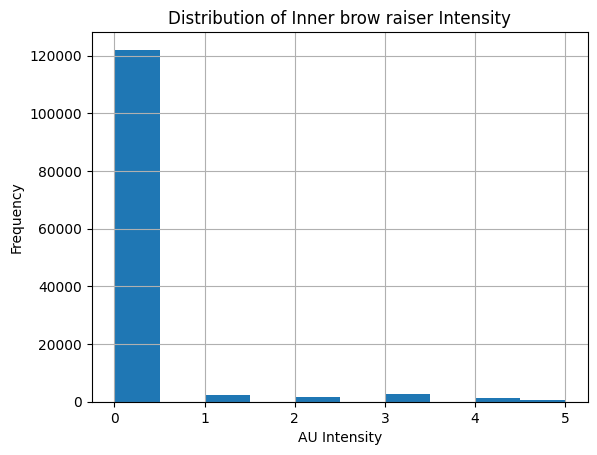

total active frame number: 6506


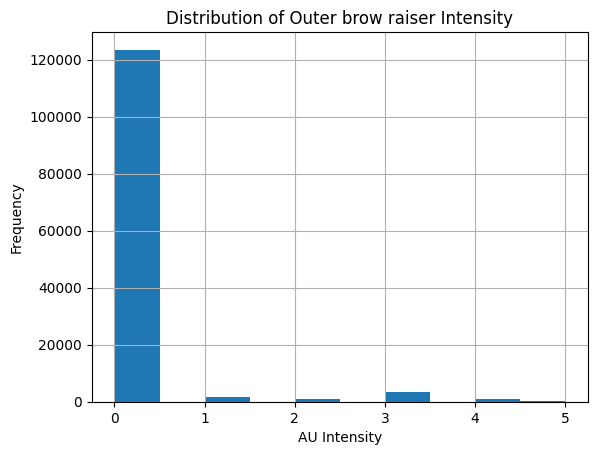

total active frame number: 5644


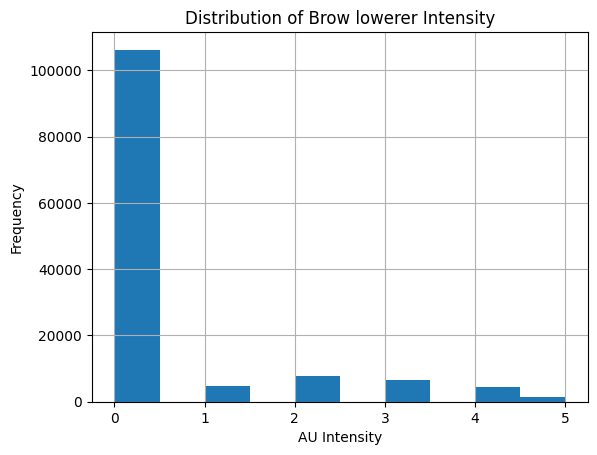

total active frame number: 19933


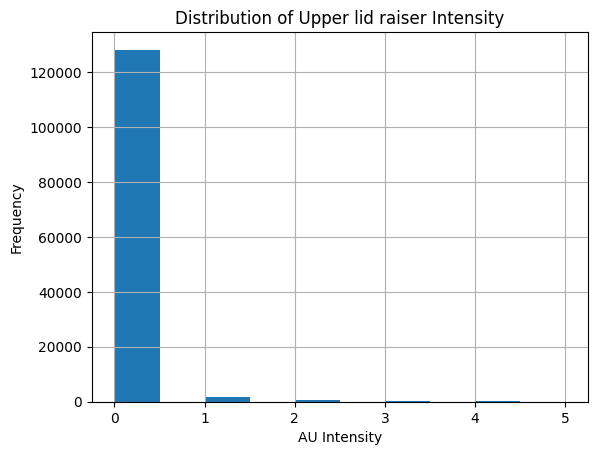

total active frame number: 1150


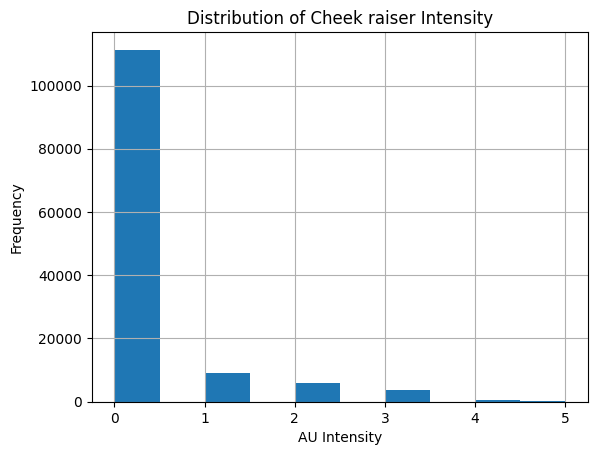

total active frame number: 10327


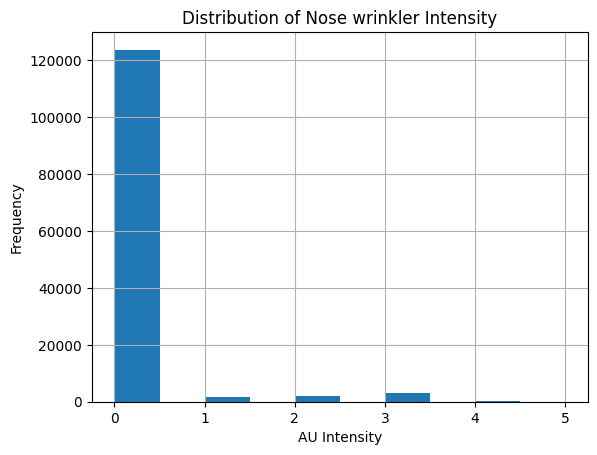

total active frame number: 5473


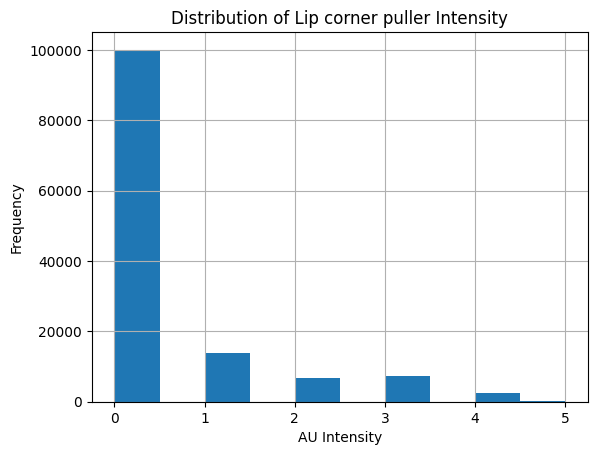

total active frame number: 16851


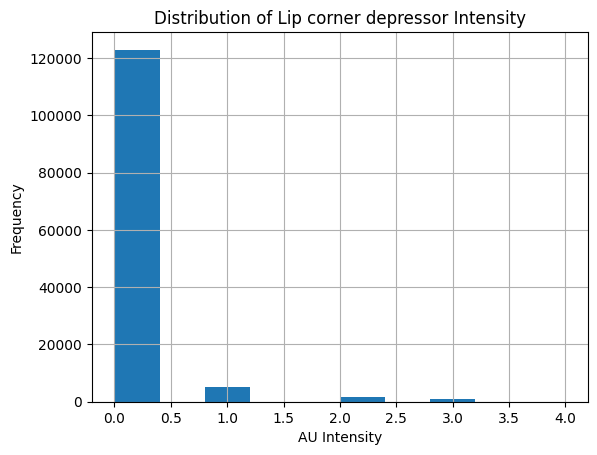

total active frame number: 2682


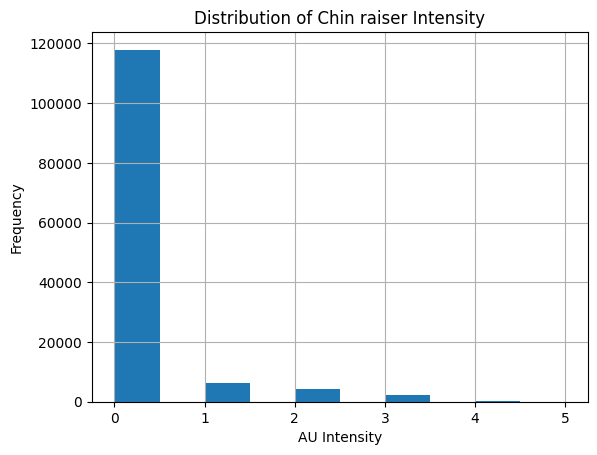

total active frame number: 6588


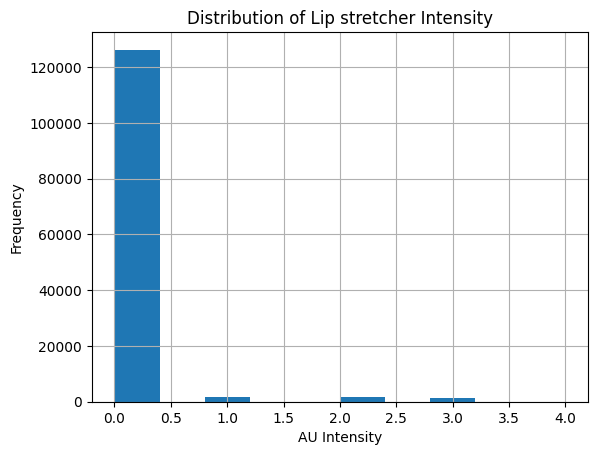

total active frame number: 2941


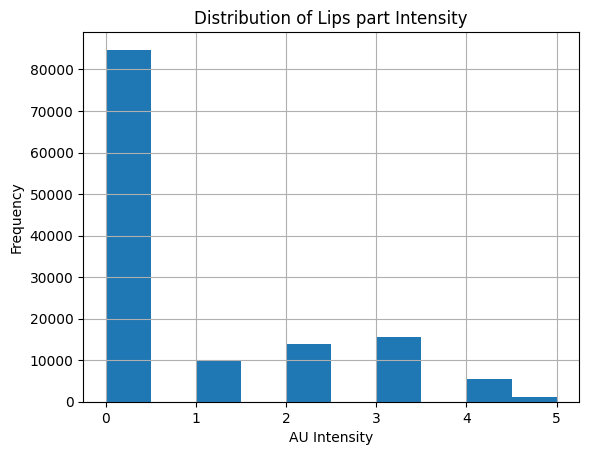

total active frame number: 36247


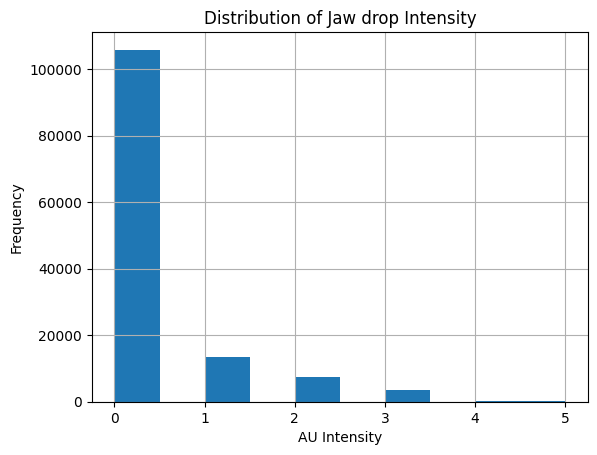

total active frame number: 11533


In [14]:
au_df_lists = {k : None for k in au_dic.keys()}
for au in au_dic.keys():
  au_df_lists[au] = au_hist_plot(au_dic[au], au_all_dic[au])

In [15]:
len(au_df_lists)

12